# Author   : Mohamed Eslam 


# Task_1 : The Spark Foundation
# Linear Regression with Python Scikit Learn
------




### Importing  libraries & Read the Data

In [1]:
# Importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Let's do some Statistics on our Data

In [3]:
# Get information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Find the null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

##### Graph of Relation of columns

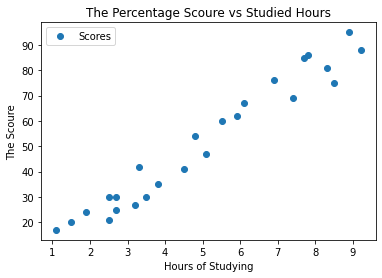

In [6]:
# Plot the the relation between Hours and Scores
data.plot(x ='Hours',y = 'Scores' ,style = 'o')
plt.xlabel("Hours of Studying")
plt.ylabel("The Scoure")
plt.title("The Percentage Scoure vs Studied Hours")
plt.show()

**It is clear that the the realtion between stuidied hours And the gain scoure is positive.**




### Preparing the data

In [7]:
# Split data into attributes and labels
X = data.iloc[: , :-1].values
y = data.iloc[ : ,1].values 

In [8]:
# Divide into train and test dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### Training the Algorithm

In [9]:
# Fit the linear Regression model 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  

reg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


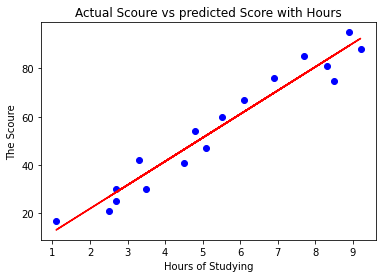

In [10]:
# Plot the Actual and predicted data in train set

plt.scatter(X_train,y_train ,c='blue')
plt.plot(X_train,reg.predict(X_train), c='red')
plt.xlabel("Hours of Studying")
plt.ylabel("The Scoure")
plt.title("Actual Scoure vs predicted Score with Hours")
plt.show()

### Making Predictions

In [11]:
# Predicting the scores
y_pred = reg.predict(X_test) # Predicting the scores
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [12]:
# Merge Actual & Predicted in one dataset
df = pd.DataFrame({ 'Hours':X_test.flatten(),'Actual_Scoure': y_test.flatten(), 'Predicted_Scoure': y_pred})  
df 

,Hours,Actual_Scoure,Predicted_Scoure
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


In [13]:
# Test with your own data
hours = [10]
own_pred = reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [10]
Predicted Score = 100.25648224983235


### Evaluating the model
The final step is to evaluate the performance of algorithm.

In [14]:
#The train and test Score
reg_score_test = reg.score(X_test, y_test)
print("The Score of Test set",reg_score_test)
reg_score_train = reg.score(X_train, y_train)
print("The Score of Train set",reg_score_train)

The Score of Test set 0.9568211104435257
The Score of Train set 0.9484997422695115


In [15]:
#the mean square error
from sklearn import metrics  
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.419727808027652
